In [6]:
import pandas as pd
import wandb

# Initialize wandb
wandb.init(project="your_project_name")

# Fetch runs from your project
api = wandb.Api()
runs = api.runs("multi_reward_feedback_final_lul", filters={"display_name": {"$regex": "^RL_.*"}})
runs_orig = api.runs("multi_reward_feedback_final", filters={"display_name": {"$regex": "^RL_.*"}})
runs_ensemble = api.runs("multi_reward_feedback_ensemble_lul", filters={"display_name": {"$regex": "^RL_.*"}})

In [8]:
# Create a list to store data from filtered runs
filtered_run_data = []

# Iterate through the runs
for run in runs_ensemble:
    # Check if the run name starts with "ppo_"
    if run.name.startswith("RL_") and "ensemble" in run.name:
        # Get the summary statistics (includes final values of metrics)
        summary = run.summary._json_dict

        # Get the history (includes all logged metrics)
        history = run.history(keys=["eval/mean_reward", "global_step"])

        # Combine summary and history data
        run_data = {
            "run_id": run.id,
            "run_name": run.name,
            **summary,
            **{f"{k}_history": v.tolist() for k, v in history.items()}
        }

        filtered_run_data.append(run_data)

"""for run in runs_orig:
    # Check if the run name starts with "ppo_"
    if run.name.startswith("RL_") and "ensemble" not in run.name:
        # Get the summary statistics (includes final values of metrics)
        summary = run.summary._json_dict

        # Get the history (includes all logged metrics)
        history = run.history(keys=["eval/mean_reward", "global_step"])

        # Combine summary and history data
        run_data = {
            "run_id": run.id,
            "run_name": run.name,
            **summary,
            **{f"{k}_history": v.tolist() for k, v in history.items()}
        }

        filtered_run_data.append(run_data)
"""

# Create a DataFrame from filtered run data
orig_df = pd.DataFrame(filtered_run_data)

In [9]:
orig_df

run_id                                           run_name      _runtime  \
0   864ecwak  RL_ppo_HalfCheetah-v5_1789_ensemble_1789_noise...  13974.540252   
1   cjvjjdj5  RL_ppo_HalfCheetah-v5_1789_ensemble_1789_noise...  14288.396812   
2   qz2eyn3d  RL_ppo_HalfCheetah-v5_1789_ensemble_1789_noise...  14011.243068   
3   r35ommth  RL_ppo_HalfCheetah-v5_1789_ensemble_1789_noise...  14333.774240   
4   4voj9j9l  RL_ppo_HalfCheetah-v5_1789_ensemble_1789_noise...  13664.655824   
5   fzn5qk8m  RL_ppo_HalfCheetah-v5_1789_ensemble_1789_noise...  14106.355472   
6   nx0pmtur  RL_ppo_HalfCheetah-v5_1789_ensemble_1789_noise...  13826.289987   
7   pwj4rm9q  RL_ppo_HalfCheetah-v5_1789_ensemble_1789_noise...  13811.980021   
8   bfcr5gda  RL_ppo_HalfCheetah-v5_1687123_ensemble_1687123...  13965.970452   
9   hltp5e4t  RL_ppo_HalfCheetah-v5_1687123_ensemble_1687123...  13665.550531   
10  hxcon2qr  RL_ppo_HalfCheetah-v5_1687123_ensemble_1687123...  13652.911331   
11  jfzuxy48  RL_ppo_HalfCheetah-v5_1687123_ensemble_1687123...  14034.489717   
12  44uflp8a  RL_ppo_HalfCheetah-v5_1687123_ensemble_1687123...  13696.642031   
13  51nioj1r  RL_ppo_HalfCheetah-v5_1687123_ensemble_1687123...  14002.326895   
14  6zginh6l  RL_ppo_HalfCheetah-v5_1687123_ensemble_1687123...  14016.097470   
15  t3sfoc0l  RL_ppo_HalfCheetah-v5_1687123_ensemble_1687123...  14055.677834   
16  b3w5ixau    RL_ppo_HalfCheetah-v5_12_ensemble_12_noise_0.75  13896.463733   
17  qxqwwueu    RL_ppo_HalfCheetah-v5_12_ensemble_12_noise_0.25  14372.946589   
18  elf4wa51     RL_ppo_HalfCheetah-v5_12_ensemble_12_noise_0.5  13981.152493   
19  sx25zll7     RL_ppo_HalfCheetah-v5_12_ensemble_12_noise_0.1  13949.143809   
20  95s9cnmo     RL_ppo_HalfCheetah-v5_12_ensemble_12_noise_0.1  14370.145399   
21  qml2ja3h    RL_ppo_HalfCheetah-v5_12_ensemble_12_noise_0.25  14520.809543   
22  64btlcc7    RL_ppo_HalfCheetah-v5_12_ensemble_12_noise_0.75  13970.684827   
23  6lwd2r1p     RL_ppo_HalfCheetah-v5_12_ensemble_12_noise_0.5  14418.223708   
24  1msf6f43   RL_ppo_Walker2d-v5_1789_ensemble_1789_noise_0.75  14627.950584   
25  95ule3xw    RL_ppo_Walker2d-v5_1789_ensemble_1789_noise_0.1  14418.251024   
26  hx3n9x3h    RL_ppo_Walker2d-v5_1789_ensemble_1789_noise_0.5  14665.010706   
27  nborvkjf   RL_ppo_Walker2d-v5_1789_ensemble_1789_noise_0.25  14208.480286   
28  1ccy5lvg  RL_ppo_Walker2d-v5_1687123_ensemble_1687123_no...  14782.264220   
29  kb2yhehy  RL_ppo_Walker2d-v5_1687123_ensemble_1687123_no...  14201.529624   
30  s0jp00dd  RL_ppo_Walker2d-v5_1687123_ensemble_1687123_no...  15123.961859   
31  x2ep1rdm  RL_ppo_Walker2d-v5_1687123_ensemble_1687123_no...  15219.028456   
32  zmmbru0s         RL_sac_Hopper-v5_12_ensemble_12_noise_0.75  31768.977873   
33  6rsy7qlo          RL_sac_Hopper-v5_12_ensemble_12_noise_0.1  31083.002827   
34  gc9waat7          RL_sac_Hopper-v5_12_ensemble_12_noise_0.5  31940.221694   
35  tcbf1mh0         RL_sac_Hopper-v5_12_ensemble_12_noise_0.25  31271.710853   
36  207k05xy        RL_ppo_Walker2d-v5_12_ensemble_12_noise_0.1  18564.479135   
37  6ztcb1vk       RL_ppo_Walker2d-v5_12_ensemble_12_noise_0.25  18854.824613   
38  pcga551w       RL_ppo_Walker2d-v5_12_ensemble_12_noise_0.75  19182.153444   
39  v4moako5        RL_ppo_Walker2d-v5_12_ensemble_12_noise_0.5  19095.399938   

    _step    _timestamp              _wandb  eval/mean_ep_length  \
0    2050  1.727770e+09  {'runtime': 13974}          1000.000000   
1    2050  1.727771e+09  {'runtime': 14289}          1000.000000   
2    2050  1.727770e+09  {'runtime': 14011}          1000.000000   
3    2050  1.727771e+09  {'runtime': 14334}          1000.000000   
4    2050  1.727770e+09  {'runtime': 13665}          1000.000000   
5    2050  1.727771e+09  {'runtime': 14106}          1000.000000   
6    2050  1.727770e+09  {'runtime': 13826}          1000.000000   
7    2050  1.727770e+09  {'runtime': 13812}          1000.000000   
8    2050  1.727785e+09  {'runtime': 13966}          1000.000000   
9   

TypeError: unhashable type: 'collections.defaultdict'

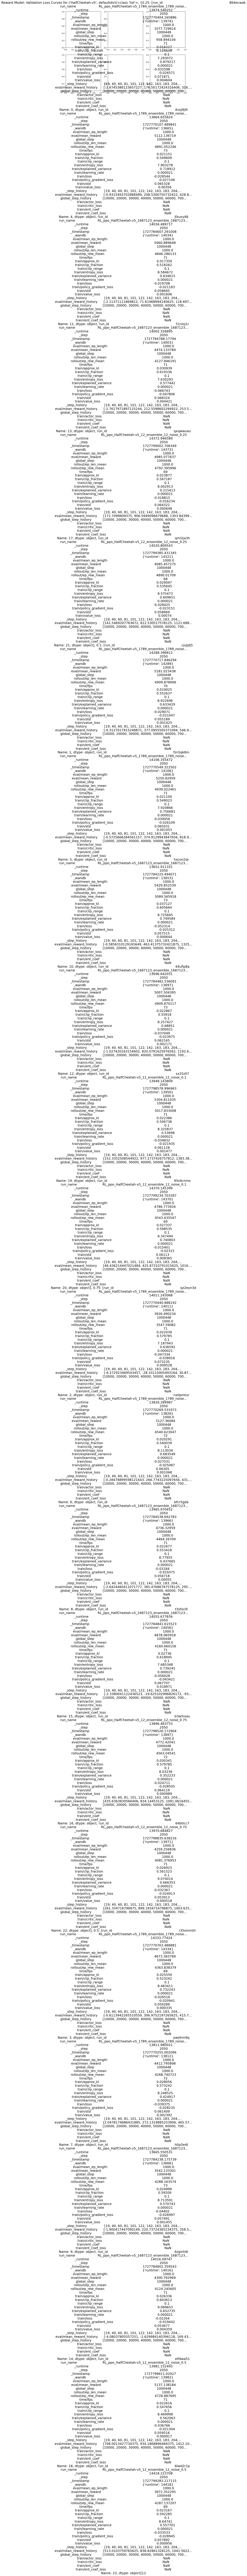

In [20]:
import colorsys
from collections import OrderedDict, defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Existing color scale
color_scale = OrderedDict([
    ('ensemble', '#53b400'),     # green
    ('comparative', '#ff7f0e'),    # orange
    ('best', '#d62728'),     # red
    ('inverse_scaling', '#0072b2'),  # pink
])

# Function to create color variations with stronger fading
def create_color_variations(base_color, num_variations=5):
    rgb = plt.matplotlib.colors.to_rgb(base_color)
    hsv = colorsys.rgb_to_hsv(*rgb)
    colors = []
    for i in range(num_variations):
        s = max(0.1, hsv[1] * (1 - i * 0.25))
        v = min(1.0, hsv[2] * (1 + i * 0.25))
        colors.append(colorsys.hsv_to_rgb(hsv[0], s, v))
    return colors

# Function to extract environment, feedback type, and noise level from run name
def extract_info(run_name):
    parts = run_name.split('_')
    env = parts[2]
    
    # Handle the special case of "descriptive_preference"
    noise = parts[-1] if parts[-2] == "noise" else "0.0"

    return env, float(noise)

def safe_convert_to_float(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.nan

# Function to interpolate NaN values in a series
def interpolate_nans(series):
    return pd.Series(series).interpolate().values

# Group runs by environment, feedback type, and noise level
grouped_runs = defaultdict(lambda: defaultdict(list))
for _, row in orig_df.iterrows():
    env, noise = extract_info(row['run_name'])
    if isinstance(row['eval/mean_reward_history'], float):
        continue
    row['eval/mean_reward_history'] = [np.nan if x == "nan" else x for x in row['eval/mean_reward_history']]
    #row['eval/mean_reward_history'] = interpolate_nans(row['eval/mean_reward_history'])
    grouped_runs[env][noise].append(row)

# Plotting function
def plot_environment(env, feedback_runs):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    fig.suptitle(f"Reward Model: Validation Loss Curves for {env}", fontsize=18)
    
    noise_levels = [0.0, 0.1, 0.25, 0.5, 0.75]
    
    ax = axes[0]
    base_color = color_scale["best"]
    color_variations = create_color_variations(base_color)
    
    for noise, color in zip(noise_levels, color_variations):
        
        runs = feedback_runs[env][noise]
        max_steps = max(max(map(safe_convert_to_float, run['global_step_history'])) for run in runs)
        
        # Create a common x-axis (steps) based on the actual step values
        common_steps = np.arange(0, int(max_steps) + 1, 1000)  # Adjust step size as needed
        
        all_losses = np.full((len(runs), len(common_steps)), np.nan)
        
        for i, run in enumerate(runs):
            steps = np.array([safe_convert_to_float(step) for step in run['global_step_history']])
            losses = np.array([safe_convert_to_float(loss) for loss in run['eval/mean_reward_history']])
            
            # Remove any NaN values
            valid = ~np.isnan(steps) & ~np.isnan(losses)
            steps = steps[valid]
            losses = losses[valid]
            
            if len(steps) > 0 and len(losses) > 0:
                # Interpolate the losses to the common step range
                interpolated_losses = np.interp(common_steps, steps, losses)
                all_losses[i] = interpolated_losses
        
        mean_loss = np.nanmean(all_losses, axis=0)
        std_loss = np.nanstd(all_losses, axis=0)
        
        ax.plot(common_steps, mean_loss, label=f"Noise {noise}", linewidth=2)
        #ax.fill_between(common_steps, mean_loss - std_loss, mean_loss + std_loss, color=color, alpha=0.2)
    
    ax.set_title(f"{feedback.capitalize()}", fontsize=14)
    ax.set_xlabel("Global Steps", fontsize=12)
    ax.set_ylabel("Reward", fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.legend(fontsize=10, loc='lower right')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
    plt.savefig(f"noise_rl_curves_{env}.png", dpi=300)
    plt.close()
    print(f"Loss curves for {env} have been saved to noise_rl_curves_{env}.png")

# Create plots for each environment
for env in grouped_runs.items():
    plot_environment(env, grouped_runs)

In [26]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb


def fetch_runs(project, env_name, run_type, noise_level=None, inverse_scaling=None):
    api = wandb.Api()
    if run_type == "ensemble":
        filter_string = f"^RL_.*{env_name}.*ensemble.*noise_{noise_level}"
        runs = api.runs(project, filters={"display_name": {"$regex": filter_string}})
        # Filter runs based on inverse_scaling
        if inverse_scaling is not None:
            runs = [run for run in runs if run.config.get('inverse_scaling', False) == inverse_scaling]
    else:  # noise runs
        filter_string = f"^RL_.*{env_name}.*noise_{noise_level}"
        runs = api.runs(project, filters={"display_name": {"$regex": filter_string}})
    return runs

def extract_run_data(run):
    summary = run.summary._json_dict
    history = run.history(keys=["eval/mean_reward", "global_step"])
    run_data = {
        "run_id": run.id,
        "run_name": run.name,
        **summary,
        **{f"{k}_history": v.tolist() for k, v in history.items()}
    }
    return run_data

def process_runs(project, env_name, run_type, noise_level, inverse_scaling=None):
    runs = fetch_runs(project, env_name, run_type, noise_level, inverse_scaling)
    return [extract_run_data(run) for run in runs]

def plot_results(env_name, ensemble_data, inverse_ensemble_data, noise_data):
    plt.figure(figsize=(12, 6))
    
    noise_levels = [0.1, 0.25, 0.5]
    colors = ['red', 'green', 'blue']
    
    for noise_level, color in zip(noise_levels, colors):
        # Plot regular ensemble data
        ensemble_runs = [run for run in ensemble_data if f"noise_{noise_level}" in run['run_name']]
        if ensemble_runs:
            ensemble_rewards = [run['eval/mean_reward_history'] for run in ensemble_runs]
            ensemble_steps = [run['global_step_history'] for run in ensemble_runs]
            ensemble_mean = np.mean(ensemble_rewards, axis=0)
            ensemble_std = np.std(ensemble_rewards, axis=0)
            plt.plot(ensemble_steps[0], ensemble_mean, label=f'Ensemble (noise {noise_level})', color=color)
            plt.fill_between(ensemble_steps[0], ensemble_mean - ensemble_std, ensemble_mean + ensemble_std, alpha=0.3, color=color)

        # Plot inverse scaling ensemble data
        inverse_ensemble_runs = [run for run in inverse_ensemble_data if f"noise_{noise_level}" in run['run_name']]
        if inverse_ensemble_runs:
            inverse_ensemble_rewards = [run['eval/mean_reward_history'] for run in inverse_ensemble_runs]
            inverse_ensemble_steps = [run['global_step_history'] for run in inverse_ensemble_runs]
            inverse_ensemble_mean = np.mean(inverse_ensemble_rewards, axis=0)
            inverse_ensemble_std = np.std(inverse_ensemble_rewards, axis=0)
            plt.plot(inverse_ensemble_steps[0], inverse_ensemble_mean, label=f'Inverse Ensemble (noise {noise_level})', color=color, linestyle=':')
            plt.fill_between(inverse_ensemble_steps[0], inverse_ensemble_mean - inverse_ensemble_std, inverse_ensemble_mean + inverse_ensemble_std, alpha=0.3, color=color)

        # Plot noise data
        noise_runs = [run for run in noise_data if f"noise_{noise_level}" in run['run_name']]
        if noise_runs:
            noise_rewards = [run['eval/mean_reward_history'] for run in noise_runs]
            noise_steps = [run['global_step_history'] for run in noise_runs]
            noise_mean = np.mean(noise_rewards, axis=0)
            noise_std = np.std(noise_rewards, axis=0)
            plt.plot(noise_steps[0], noise_mean, label=f'Noise {noise_level}', color=color, linestyle='--')
            #plt.fill_between(noise_steps[0], noise_mean - noise_std, noise_mean + noise_std, alpha=0.3, color=color)

    plt.title(f'Performance Comparison for {env_name}')
    plt.xlabel('Global Steps')
    plt.ylabel('Mean Reward')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig(f'{env_name}_performance_comparison.png')
    #plt.close()

def main():
    wandb.init(project="your_project_name")
    
    environments = ["HalfCheetah-v5", "Walker2d-v5", "Hopper-v5"]
    noise_levels = [0.1, 0.25, 0.5]
    
    for env in environments:
        print(f"Processing {env}...")
        
        ensemble_data = []
        inverse_ensemble_data = []
        noise_data = []
        
        for noise_level in noise_levels:
            ensemble_data.extend(process_runs("multi_reward_feedback_ensemble_lul", env, "ensemble", noise_level, inverse_scaling=False))
            inverse_ensemble_data.extend(process_runs("multi_reward_feedback_ensemble_lul", env, "ensemble", noise_level, inverse_scaling=True))
            noise_data.extend(process_runs("multi_reward_feedback_final_lul", env, "average", noise_level))
        
        plot_results(env, ensemble_data, inverse_ensemble_data, noise_data)
        
        print(f"Completed processing for {env}. Plot saved as {env}_performance_comparison.png")

if __name__ == "__main__":
    main()

Processing HalfCheetah-v5...
Completed processing for HalfCheetah-v5. Plot saved as HalfCheetah-v5_performance_comparison.png
Processing Walker2d-v5...


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (18,) + inhomogeneous part.

Processing HalfCheetah-v5...
Completed processing for HalfCheetah-v5. Plots saved as HalfCheetah-v5_performance_comparison_with_fill.png and HalfCheetah-v5_performance_comparison.png
Processing Walker2d-v5...


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (18,) + inhomogeneous part.

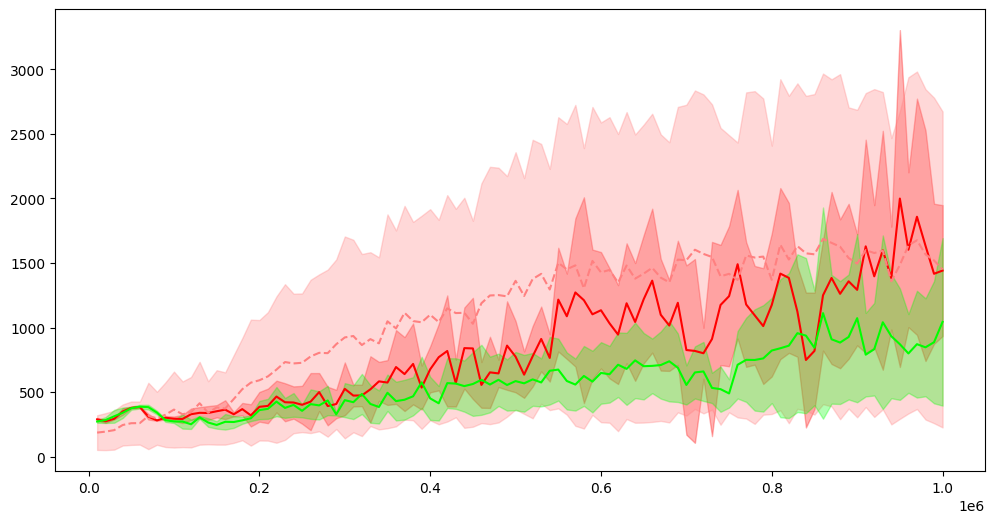

In [27]:
import colorsys
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb


def create_color_variations(base_color, num_variations=5):
    rgb = plt.matplotlib.colors.to_rgb(base_color)
    hsv = colorsys.rgb_to_hsv(*rgb)
    colors = []
    for i in range(num_variations):
        s = max(0.1, hsv[1] * (1 - i * 0.25))
        v = min(1.0, hsv[2] * (1 + i * 0.25))
        colors.append(colorsys.hsv_to_rgb(hsv[0], s, v))
    return colors

def fetch_runs(project, env_name, run_type, noise_level=None, inverse_scaling=None, baseline_type=None):
    api = wandb.Api()
    if run_type == "ensemble":
        filter_string = f"^RL_.*{env_name}.*ensemble.*noise_{noise_level}"
        runs = api.runs(project, filters={"display_name": {"$regex": filter_string}})
        if inverse_scaling is not None:
            runs = [run for run in runs if run.config.get('inverse_scaling', False) == inverse_scaling]
    elif run_type == "average":
        filter_string = f"^RL_.*{env_name}.*noise_{noise_level}"
        runs = api.runs(project, filters={"display_name": {"$regex": filter_string}})
    elif run_type == "baseline":
        filter_string = f"^RL_.*{env_name}.*{baseline_type}"
        runs = api.runs(project, filters={"display_name": {"$regex": filter_string}})
    return runs

def extract_run_data(run):
    summary = run.summary._json_dict
    history = run.history(keys=["eval/mean_reward", "global_step"])
    run_data = {
        "run_id": run.id,
        "run_name": run.name,
        **summary,
        **{f"{k}_history": v.tolist() for k, v in history.items()}
    }
    return run_data

def process_runs(project, env_name, run_type, noise_level=None, inverse_scaling=None, baseline_type=None):
    runs = fetch_runs(project, env_name, run_type, noise_level, inverse_scaling, baseline_type)
    return [extract_run_data(run) for run in runs]

def plot_results(env_name, ensemble_data, inverse_ensemble_data, noise_data, baseline_data, with_fill=True):
    plt.figure(figsize=(12, 6))
    
    noise_levels = [0.1, 0.25, 0.5]
    base_colors = ['#FF0000', '#00FF00', '#0000FF']  # Red, Green, Blue
    
    for i, noise_level in enumerate(noise_levels):
        colors = create_color_variations(base_colors[i], 3)
        
        # Plot regular ensemble data
        ensemble_runs = [run for run in ensemble_data if f"noise_{noise_level}" in run['run_name']]
        if ensemble_runs:
            ensemble_rewards = [run['eval/mean_reward_history'] for run in ensemble_runs]
            ensemble_steps = [run['global_step_history'] for run in ensemble_runs]
            ensemble_mean = np.mean(ensemble_rewards, axis=0)
            ensemble_std = np.std(ensemble_rewards, axis=0)
            plt.plot(ensemble_steps[0], ensemble_mean, label=f'Ensemble (noise {noise_level})', color=colors[0])
            if with_fill:
                plt.fill_between(ensemble_steps[0], ensemble_mean - ensemble_std, ensemble_mean + ensemble_std, alpha=0.3, color=colors[0])

        # Plot inverse scaling ensemble data
        inverse_ensemble_runs = [run for run in inverse_ensemble_data if f"noise_{noise_level}" in run['run_name']]
        if inverse_ensemble_runs:
            inverse_ensemble_rewards = [run['eval/mean_reward_history'] for run in inverse_ensemble_runs]
            inverse_ensemble_steps = [run['global_step_history'] for run in inverse_ensemble_runs]
            inverse_ensemble_mean = np.mean(inverse_ensemble_rewards, axis=0)
            inverse_ensemble_std = np.std(inverse_ensemble_rewards, axis=0)
            plt.plot(inverse_ensemble_steps[0], inverse_ensemble_mean, label=f'Inverse Ensemble (noise {noise_level})', color=colors[1], linestyle=':')
            if with_fill:
                plt.fill_between(inverse_ensemble_steps[0], inverse_ensemble_mean - inverse_ensemble_std, inverse_ensemble_mean + inverse_ensemble_std, alpha=0.3, color=colors[1])

        # Plot noise data
        noise_runs = [run for run in noise_data if f"noise_{noise_level}" in run['run_name']]
        if noise_runs:
            noise_rewards = [run['eval/mean_reward_history'] for run in noise_runs]
            noise_steps = [run['global_step_history'] for run in noise_runs]
            noise_mean = np.mean(noise_rewards, axis=0)
            noise_std = np.std(noise_rewards, axis=0)
            plt.plot(noise_steps[0], noise_mean, label=f'Noise {noise_level}', color=colors[2], linestyle='--')
            if with_fill:
                plt.fill_between(noise_steps[0], noise_mean - noise_std, noise_mean + noise_std, alpha=0.3, color=colors[2])

    # Plot baseline data
    baseline_colors = ['#800080', '#FFA500', '#008080']  # Purple, Orange, Teal
    baseline_types = ['average', 'comparative', 'descriptive']
    for i, (baseline_type, color) in enumerate(zip(baseline_types, baseline_colors)):
        baseline_runs = [run for run in baseline_data if baseline_type in run['run_name']]
        if baseline_runs:
            baseline_rewards = [run['eval/mean_reward_history'] for run in baseline_runs]
            baseline_steps = [run['global_step_history'] for run in baseline_runs]
            baseline_mean = np.mean(baseline_rewards, axis=0)
            baseline_std = np.std(baseline_rewards, axis=0)
            plt.plot(baseline_steps[0], baseline_mean, label=f'Baseline ({baseline_type})', color=color, linestyle='-.')
            if with_fill:
                plt.fill_between(baseline_steps[0], baseline_mean - baseline_std, baseline_mean + baseline_std, alpha=0.3, color=color)

    plt.title(f'Performance Comparison for {env_name}')
    plt.xlabel('Global Steps')
    plt.ylabel('Mean Reward')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig(f'{env_name}_performance_comparison{"_with_fill" if with_fill else ""}.png')
    plt.close()

def main():
    wandb.init(project="your_project_name")
    
    environments = ["HalfCheetah-v5", "Walker2d-v5", "Hopper-v5"]
    noise_levels = [0.1, 0.25, 0.5]
    baseline_types = ['average', 'comparative', 'descriptive']
    
    for env in environments:
        print(f"Processing {env}...")
        
        ensemble_data = []
        inverse_ensemble_data = []
        noise_data = []
        baseline_data = []
        
        for noise_level in noise_levels:
            ensemble_data.extend(process_runs("multi_reward_feedback_ensemble_lul", env, "ensemble", noise_level, inverse_scaling=False))
            inverse_ensemble_data.extend(process_runs("multi_reward_feedback_ensemble_lul", env, "ensemble", noise_level, inverse_scaling=True))
            noise_data.extend(process_runs("multi_reward_feedback_final_lul", env, "noise", noise_level))
        
        for baseline_type in baseline_types:
            baseline_data.extend(process_runs("multi_reward_feedback_final", env, "baseline", baseline_type=baseline_type))
        
        # Create plot with fill_between
        plot_results(env, ensemble_data, inverse_ensemble_data, noise_data, baseline_data, with_fill=True)
        
        # Create plot without fill_between
        plot_results(env, ensemble_data, inverse_ensemble_data, noise_data, baseline_data, with_fill=False)
        
        print(f"Completed processing for {env}. Plots saved as {env}_performance_comparison_with_fill.png and {env}_performance_comparison.png")

if __name__ == "__main__":
    main()

In [43]:
import colorsys
from collections import defaultdict

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb

matplotlib.rcParams.update({'font.size': 22})

def create_color_variations(base_color, num_variations=4):
    rgb = plt.matplotlib.colors.to_rgb(base_color)
    hsv = colorsys.rgb_to_hsv(*rgb)
    colors = []
    for i in range(num_variations):
        s = max(0.1, hsv[1] * (1 - i * 0.2))
        v = min(1.0, hsv[2] * (1 + i * 0.2))
        colors.append(colorsys.hsv_to_rgb(hsv[0], s, v))
    return colors

def pad_array(arr, target_length=100):
    """
    Pad the array to the target length by repeating the last value.
    If the array is already longer than the target length, return it as is.
    """
    if len(arr) >= target_length:
        return arr
    padding = [arr[-1]] * (target_length - len(arr))
    return np.concatenate([arr, padding])

def fetch_runs(project, env_name, run_type, noise_level=None, inverse_scaling=None, baseline_type=None):
    api = wandb.Api()
    if run_type == "ensemble":
        filter_string = f"^RL_.*{env_name}.*ensemble.*noise_{noise_level}"
        runs = api.runs(project, filters={"display_name": {"$regex": filter_string}})
        if inverse_scaling is not None:
            runs = [run for run in runs if run.config.get('inverse_scaling', False) == inverse_scaling]
    elif run_type == "average":
        filter_string = f"^RL_.*{env_name}.*noise_{noise_level}"
        runs = api.runs(project, filters={"display_name": {"$regex": filter_string}})
    elif run_type == "baseline":
        filter_string = f"^RL_.*{env_name}.*{baseline_type}"
        runs = api.runs(project, filters={"display_name": {"$regex": filter_string}})
    return runs

def extract_run_data(run):
    summary = run.summary._json_dict
    history = run.history(keys=["eval/mean_reward", "global_step"])
    run_data = {
        "run_id": run.id,
        "run_name": run.name,
        **summary,
        **{f"{k}_history": v.tolist() for k, v in history.items()}
    }
    return run_data

def process_runs(project, env_name, run_type, noise_level=None, inverse_scaling=None, baseline_type=None):
    runs = fetch_runs(project, env_name, run_type, noise_level, inverse_scaling, baseline_type)
    return [extract_run_data(run) for run in runs]

def plot_results(env_name, ensemble_data, inverse_ensemble_data, noise_data, baseline_data, with_fill=True):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    noise_levels = [0.1, 0.25, 0.5, 0.75]
    colors = {
        'ensemble': '#1f77b4',  # blue
        'uncertainty_ensemble': '#ff7f0e',  # orange
        'average': '#2ca02c',  # green
        'average': '#d62728',  # red
        'comparative': '#9467bd',  # purple
        'descriptive': '#8c564b',  # brown
    }
    
    legend_elements = []
    
    for run_type in ['ensemble', 'uncertainty_ensemble', 'average']:
        color_variations = create_color_variations(colors[run_type])
        for i, noise_level in enumerate(noise_levels):
            if run_type == 'ensemble':
                runs = [run for run in ensemble_data if f"noise_{noise_level}" in run['run_name']]
            elif run_type == 'uncertainty_ensemble':
                runs = [run for run in inverse_ensemble_data if f"noise_{noise_level}" in run['run_name']]
            else:
                runs = [run for run in noise_data if f"noise_{noise_level}" in run['run_name']]
            
            if runs:
                rewards = [pad_array(np.array(run['eval/mean_reward_history'])) for run in runs]
                steps = [pad_array(np.array(run['global_step_history'])) for run in runs]

                mean = np.mean(rewards, axis=0)
                std = np.std(rewards, axis=0)
                
                linestyle = '-' if run_type == 'ensemble' or run_type == 'uncertainty_ensemble' else '--'
                line, = ax.plot(steps[0], mean, color=color_variations[i], linestyle=linestyle)
                if with_fill:
                    ax.fill_between(steps[0], mean - std, mean + std, alpha=0.3, color=color_variations[i])
                
                if i == 0:  # Only add to legend for the first noise level
                    legend_elements.append((line, f"{run_type.replace('_', ' ').title()}"))
    
    # Plot baseline data
    for baseline_type in ['average', 'comparative', 'descriptive']:
        baseline_runs = [run for run in baseline_data if baseline_type in run['run_name']]
        if baseline_runs:
            baseline_rewards = [run['eval/mean_reward_history'] for run in baseline_runs]
            baseline_steps = [run['global_step_history'] for run in baseline_runs]
            baseline_mean = np.mean(baseline_rewards, axis=0)
            baseline_std = np.std(baseline_rewards, axis=0)
            line, = ax.plot(baseline_steps[0], baseline_mean, color=colors[baseline_type], linestyle='-.', linewidth=2.0)
            if with_fill:
                ax.fill_between(baseline_steps[0], baseline_mean - baseline_std, baseline_mean + baseline_std, alpha=0.3, color=colors[baseline_type])
            legend_elements.append((line, f"Baseline ({baseline_type})"))

    ax.set_title(f'Performance Comparison for {env_name}', fontsize=18)
    ax.set_xlabel('Global Steps', fontsize=16)
    ax.set_ylabel('Mean Reward', fontsize=16)
    ax.grid(True, alpha=0.3)

    # Create a separate legend
    ax.legend(*zip(*legend_elements), prop={'size': 16})
    plt.tight_layout()
    
    plt.savefig(f'{env_name}_performance_comparison{"_with_fill" if with_fill else ""}.png', bbox_inches='tight')
    plt.close()

def main():
    wandb.init(project="your_project_name")
    
    environments = ["HalfCheetah-v5"]
    noise_levels = [0.1, 0.25, 0.5, 0.75]
    baseline_types = ['average', 'comparative', 'descriptive']
    
    for env in environments:
        print(f"Processing {env}...")
        
        ensemble_data = []
        inverse_ensemble_data = []
        noise_data = []
        baseline_data = []
        
        for noise_level in noise_levels:
            ensemble_data.extend(process_runs("multi_reward_feedback_ensemble_lul", env, "ensemble", noise_level, inverse_scaling=False))
            inverse_ensemble_data.extend(process_runs("multi_reward_feedback_ensemble_lul", env, "ensemble", noise_level, inverse_scaling=True))
            noise_data.extend(process_runs("multi_reward_feedback_final_lul", env, "average", noise_level))
        
        for baseline_type in baseline_types:
            baseline_data.extend(process_runs("multi_reward_feedback_final", env, "baseline", baseline_type=baseline_type))
        
        # Create plot with fill_between
        plot_results(env, ensemble_data, inverse_ensemble_data, noise_data, baseline_data, with_fill=True)
        
        # Create plot without fill_between
        plot_results(env, ensemble_data, inverse_ensemble_data, noise_data, baseline_data, with_fill=False)
        
        print(f"Completed processing for {env}. Plots saved as {env}_performance_comparison_with_fill.png and {env}_performance_comparison.png")

if __name__ == "__main__":
    main()

Processing HalfCheetah-v5...
Completed processing for HalfCheetah-v5. Plots saved as HalfCheetah-v5_performance_comparison_with_fill.png and HalfCheetah-v5_performance_comparison.png
